## Python Scripts to help generate augmented images from a fixed set of images


## Method 1:
### Augment images using the library "imgaug"
- ### version 0.4.0
- pip install imgaug==0.4.0
- cv2 for reading and displaying, writing image
- imgaug : library to perform image augmentation
##### Images folders:
- Source images: C:\CA1\source\
- Destination images: C:\CA1\processed\
##### image_offset
- Set the image offset to number new augmented images in an ordered ascending sequence

In [127]:
import imgaug as ia  #version 0.4.0, pip install imgaug==0.4.0
from imgaug import augmenters as iaa
import os
import cv2
from random import randrange

images_path="C:/CA1/source" #path to original images
augmented_path="C:/CA1/processed" # path to store aumented images

def CreateBorder(img):
    image = cv2.copyMakeBorder(img, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=(0,0,0))
    return image

In [ ]:

image_offset = 0

ia.seed(randrange(10))

seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    #iaa.Crop(percent=(0, 0.1)),
    iaa.Sharpen(alpha=(0, 1.0), lightness=(1, 1.15)),
    
    #iaa.Affine(rotate=(-25,25))
    iaa.Affine(
        scale={"x": (1, 1.2), "y": (1, 1.2)},
        translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
        rotate=(-25, 25),
        shear=(-2, 2)
    )    
], random_order=True)

if not os.path.exists(augmented_path):
    os.makedirs(augmented_path)

imglist = []

for file in os.listdir(images_path):      
    #print(file)
    img = cv2.imread(images_path+'/'+ file)
    img1 = CreateBorder(img)
    imglist.append(img1)
    
    
images_aug = seq.augment_images(images=imglist)
k = 1
for c in range(len(images_aug)):
    new_image_path= "%s/image%s.jpg" %(augmented_path, k+ image_offset)    
    cv2.imwrite(new_image_path, images_aug[c])
    print("Create new image: " + new_image_path)
    k = k + 1

            
            

## Method 2:
### import necessary packages used for manipulating operations on image

- cv2 for reading and displaying, writing image
- numpy for manipulating image as image is matrix of pixel values
- skimage is package which provides many methods which help to transform image

##### Images folders:
- Source images: C:\CA1\source\
- Destination images: C:\CA1\processed\
##### image_offset
- Set the image offset to number new augmented images in an ordered ascending sequence

In [116]:
import cv2
 
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise

In [123]:
def LoadImage(imagefile):
    img= cv2.imread(imagefile)
    img= cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    return img

def CreateBorder(img):
    image = cv2.copyMakeBorder(img, 80, 80, 50, 50, cv2.BORDER_CONSTANT, value=(0,0,0))
    return image

In [118]:
#Lets define functions for each operation
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, -angle)

def h_flip(image):
    rotate(image, -30)
    return  np.fliplr(image)

def v_flip(image):
    rotate(image, 30)
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(img, (9,9),0)

#I would not recommend warp_shifting, because it distorts image, but can be used in many use case like 
#classifying blur and non-blur images
def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image

## Some Examples:
### Flip image horizontally or vertically

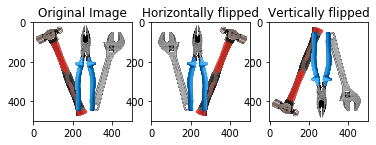

In [124]:
images_path="C:/CA1/source" #path to original images
img = LoadImage(images_path + "/image1.jpg")

plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img)

hflipped_image= np.fliplr(img) #fliplr reverse the order of columns of pixels in matrix
plt.subplot(132) 
plt.title("Horizontally flipped")
plt.imshow(hflipped_image)

vflipped_image= np.flipud(img) #flipud reverse the order of rows of pixels in matrix
plt.subplot(133)
plt.title("Vertically flipped")
plt.imshow(vflipped_image)
plt.show()

### Add a border and rotate image clockwise or anti-clockwise

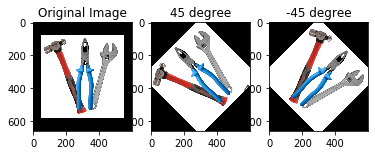

In [125]:
img2 = CreateBorder(img)
plt.subplot(131) 
plt.title("Original Image") 
plt.imshow(img2)

r_image1 = rotate(img2, angle=45) # angle value is positive for anticlockwise rotation 
r_image2 = rotate(img2, angle=-45) #angle value is negative for clockwise rotation

plt.subplot(132)
plt.title("45 degree")
plt.imshow(r_image1)

plt.subplot(133)
plt.title("-45 degree")
plt.imshow(r_image2)


plt.show()

### Script to apply image augmentation: 
- flip and rotate functions with border and store new augmented images
- Source folder: C:/CA1/source
- Processed folder: C:/CA1/processed
- Example image file names: image1.jpg, image2.jpg
- image_offset = running number of processed image name
- images_to_generate = the number of source images in the folder C:/CA1/source
#### Important: 
- Need to set image_offset for numbering the processed image file name.

In [ ]:
image_offset = 0
# set image_offset to the last image number so that new image file name would
# start with image_offset + 1 

transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip
                 } 

images_path="C:/CA1/source" #path to original images
augmented_path="C:/CA1/processed" # path to store aumented images
images=[] # to store paths of images from folder

for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
    images.append(os.path.join(images_path,im))

images_to_generate=135  #you can change this value according to your requirement
i=1                        # variable to iterate till images_to_generate
print("Number of images: ", len(images))

while i<=images_to_generate:    
    imagefile=random.choice(images)
    #imagefile = images[i-1]
    #print(imagefile)
    
    original_image = io.imread(imagefile)
    original_image = CreateBorder(original_image)
    transformed_image=None
    #print("i: ",i)
    n = 0       #variable to iterate till number of transformation to apply
    transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image
    
 
    while n <= transformation_count:
        key = random.choice(list(transformations)) #randomly choosing method to call
        transformed_image = transformations[key](original_image)
        n = n + 1
        
    new_image_path= "%s/image%s.jpg" %(augmented_path, i+ image_offset)
    print("Create new image: " + new_image_path)
    transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
    new_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
    cv2.imwrite(new_image_path, new_image) # save transformed image to path
 
    new_image=None
    i =i+1
 